## Prerequisites

In [1]:
!pip install keras

  Could not fetch URL https://pypi.python.org/simple/keras/: There was a problem confirming the ssl certificate: [SSL: TLSV1_ALERT_PROTOCOL_VERSION] tlsv1 alert protocol version (_ssl.c:661) - skipping
  Could not find a version that satisfies the requirement keras (from versions: )
No matching distribution found for keras
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


## Load Dataset

In [3]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualize

[5 0 4 1 9 2 1 3 1 4]


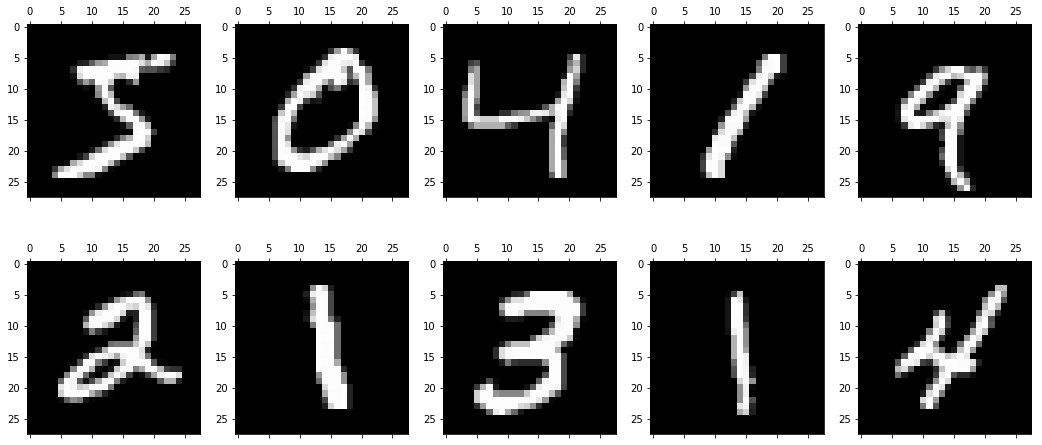

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Single-layer & Multi-layer Neural Network

### Preprocessing

In [5]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [6]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


### Build a Single-layer Neural Network

In [7]:
# Write your code here!

from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

model = Sequential()
model.add(Dense(units = 10, 
                activation = 'sigmoid',
                kernel_initializer = RandomUniform(minval=-0.001, maxval=0.001),
                input_shape = (784,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.optimizers import SGD

optimizer = SGD(lr=0.00001)

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
model.fit(X_train,
          y_train_hot,
          epochs = 20,
          validation_data = (X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.4189 - acc: 0.8781 - val_loss: 0.3309 - val_acc: 0.9074
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3443 - acc: 0.9043 - val_loss: 0.3776 - val_acc: 0.8921
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3315 - acc: 0.9088 - val_loss: 0.3424 - val_acc: 0.9057
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.3220 - acc: 0.9102 - val_loss: 0.3511 - val_acc: 0.8986
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.3151 - acc: 0.9127 - val_loss: 0.3090 - val_acc: 0.9169
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.3104 - acc: 0.9137 - val_loss: 0.3033 - val_acc: 0.9174
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.3098 - acc: 0.9140 - val_loss: 0.3695 - val_acc

### Build a Multi-layer Neural Network

In [10]:
# Write your code here!

# Write your code here!

from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

model = Sequential()
model.add(Dense(units = 10, 
                activation = 'sigmoid',
                kernel_initializer = RandomUniform(minval=-0.001, maxval=0.001),
                input_shape = (784,)))

model.add(Dense(units = 10,
                activation = 'sigmoid',
                kernel_initializer = RandomUniform(minval=-0.001, maxval=0.001)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.optimizers import SGD

optimizer = SGD(lr=0.00001)

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
model.fit(X_train,
          y_train_hot,
          epochs = 10,
          validation_data = (X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 2.3025 - acc: 0.1413 - val_loss: 2.3025 - val_acc: 0.1849
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 2.3024 - acc: 0.2168 - val_loss: 2.3024 - val_acc: 0.2488
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 2.3023 - acc: 0.2631 - val_loss: 2.3023 - val_acc: 0.2834
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 2.3022 - acc: 0.2976 - val_loss: 2.3021 - val_acc: 0.3165
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 2.3020 - acc: 0.3279 - val_loss: 2.3019 - val_acc: 0.3477
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 2.3018 - acc: 0.3641 - val_loss: 2.3017 - val_acc: 0.3780
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 2.3016 - acc: 0.3911 - val_loss: 2.3014 - val_acc

## Convolutional Neural Network

## Preprocessing

In [13]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## Build a Model

### Convolutional Neural Network

In [19]:
# Write your code here!

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.initializers import RandomUniform

model = Sequential()
model.add(Conv2D(filters = 6,
                 kernel_size = (5, 5),
                 kernel_initializer = 'random_uniform',
                 activation = 'sigmoid',
                 input_shape = (28, 28, 1)))

model.add(MaxPooling2D(pool_size = (2, 2),
                       strides = (2, 2)))

model.add(Conv2D(filters = 12,
                 kernel_size = (5, 5),
                 kernel_initializer = 'random_uniform',
                 activation = 'sigmoid'))

model.add(MaxPooling2D(pool_size = (2, 2), 
                       strides = (2, 2)))

from keras.layers import Flatten

model.add(Flatten())

model.add(Dense(units = 128,
                activation = 'sigmoid',
                kernel_initializer = 'random_uniform',
                input_shape = (784, )))

model.add(Dense(units = 10,
                activation = 'sigmoid',
                kernel_initializer = 'random_uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 12)          1812      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               24704     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total para

In [20]:
from keras.optimizers import SGD

optimizer = SGD(lr=1.0)

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
model.fit(X_train,
          y_train_hot,
          epochs = 10,
          validation_data = (X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 293us/step - loss: 2.0889 - acc: 0.1888 - val_loss: 0.4135 - val_acc: 0.8674
Epoch 2/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.2127 - acc: 0.9340 - val_loss: 0.1307 - val_acc: 0.9583
Epoch 3/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.1195 - acc: 0.9617 - val_loss: 0.0818 - val_acc: 0.9729
Epoch 4/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0902 - acc: 0.9712 - val_loss: 0.0791 - val_acc: 0.9754
Epoch 5/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0877 - acc: 0.9725 - val_loss: 0.0689 - val_acc: 0.9772
Epoch 6/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0739 - acc: 0.9765 - val_loss: 0.0729 - val_acc: 0.9759
Epoch 7/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0659 - acc: 0.9785 - val_loss: 0.